In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import platform
from matplotlib import font_manager, rc

In [119]:
df=pd.read_csv("D:\manifest-mini\hoyeon\기아_지역별수출실적_전처리.CSV")

In [120]:
df.head()

,차량 구분,국가명,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도
0,승용차,US,1048.0,633.0,627.0,245.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,5.0,2023
1,휴양용 차량,US,33056.0,29697.0,31985.0,29103.0,28763.0,26013.0,27234.0,22619.0,20969.0,24759.0,33951.0,30920.0,2023
2,상업용 차량,US,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2023
3,특수 차량,US,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,2023
4,CKD(모듈형 조립 방식),US,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2023


In [121]:
df["차량 구분"].unique()

array(['승용차', '휴양용 차량', '상업용 차량', '특수 차량', 'CKD(모듈형 조립 방식)', '총합',
       'CKD(특수 차량 제외)', 'CKD(특수 차량)'], dtype=object)

In [122]:
# 일반 차량 및 특수 차량 분류 기준
general_types = ['승용차', '휴양용 차량', '상업용 차량', '총합']
special_types = ['특수 차량', 'CKD(모듈형 조립 방식)', 'CKD(특수 차량 제외)', 'CKD(특수 차량)']

# 차량 구분 분류 열 추가
df['차량 구분 분류'] = df['차량 구분'].apply(
    lambda x: '일반 차량' if x in general_types else '특수 차량'
)


In [123]:
df

,차량 구분,국가명,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도,차량 구분 분류
0,승용차,US,1048.0,633.0,627.0,245.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,5.0,2023,일반 차량
1,휴양용 차량,US,33056.0,29697.0,31985.0,29103.0,28763.0,26013.0,27234.0,22619.0,20969.0,24759.0,33951.0,30920.0,2023,일반 차량
2,상업용 차량,US,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2023,일반 차량
3,특수 차량,US,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,2023,특수 차량
4,CKD(모듈형 조립 방식),US,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2023,특수 차량
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,휴양용 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,일반 차량
186,상업용 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,일반 차량
187,특수 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,특수 차량
188,CKD(특수 차량 제외),China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,특수 차량


In [124]:
df1=pd.read_csv("D:\manifest-mini\hoyeon\기아_차종별판매실적_전처리.CSV")

In [125]:
df1.head()

,차종,차량 구분,거래 유형,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도
0,Morning,일반 차량,국내,1813.0,2049.0,2127.0,2164.0,2502.0,2245.0,2033.0,2910.0,1892.0,2225.0,2111.0,1808.0,2023
1,Ray,일반 차량,국내,3585.0,4268.0,4155.0,4158.0,4576.0,4372.0,4285.0,4402.0,3464.0,4824.0,4587.0,4254.0,2023
2,K3,일반 차량,국내,950.0,1024.0,1197.0,670.0,975.0,1540.0,976.0,1123.0,1036.0,939.0,1428.0,1346.0,2023
3,K5,일반 차량,국내,2560.0,2653.0,3421.0,2739.0,3166.0,2963.0,2246.0,2613.0,2280.0,2592.0,3783.0,3563.0,2023
4,Stinger,일반 차량,국내,113.0,120.0,143.0,61.0,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023


In [126]:
df1["거래 유형"].unique()

array(['국내', '수출', '수출(CKD 제외)'], dtype=object)

In [127]:
df1["차량 구분"].unique()

array(['일반 차량', '특수 차량'], dtype=object)

In [128]:
df

,차량 구분,국가명,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도,차량 구분 분류
0,승용차,US,1048.0,633.0,627.0,245.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,5.0,2023,일반 차량
1,휴양용 차량,US,33056.0,29697.0,31985.0,29103.0,28763.0,26013.0,27234.0,22619.0,20969.0,24759.0,33951.0,30920.0,2023,일반 차량
2,상업용 차량,US,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2023,일반 차량
3,특수 차량,US,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,2023,특수 차량
4,CKD(모듈형 조립 방식),US,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2023,특수 차량
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,휴양용 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,일반 차량
186,상업용 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,일반 차량
187,특수 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,특수 차량
188,CKD(특수 차량 제외),China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,특수 차량


In [129]:
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


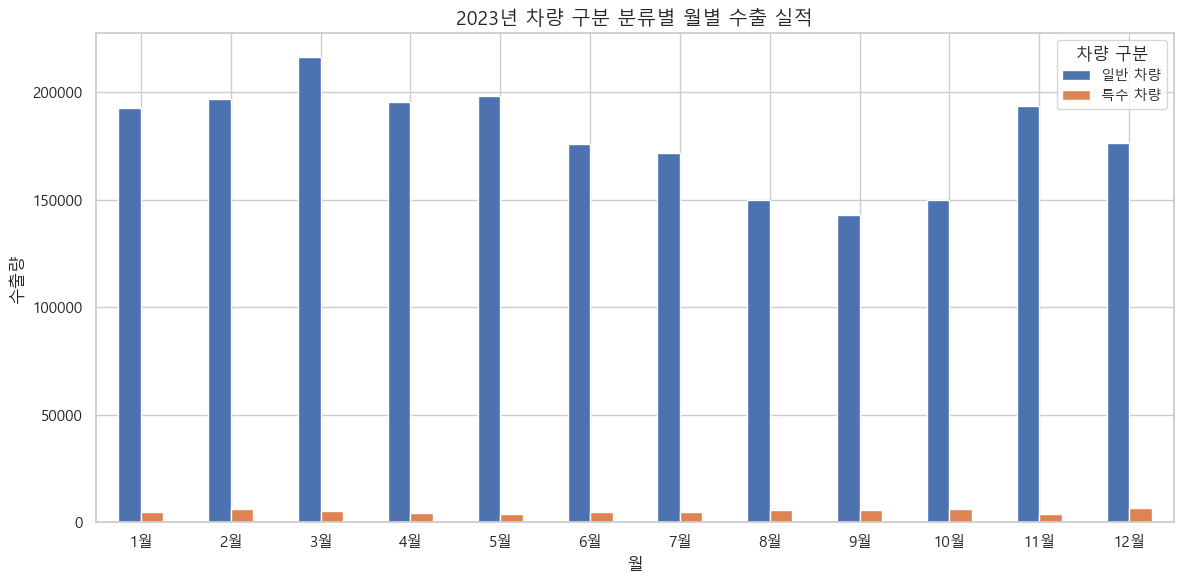

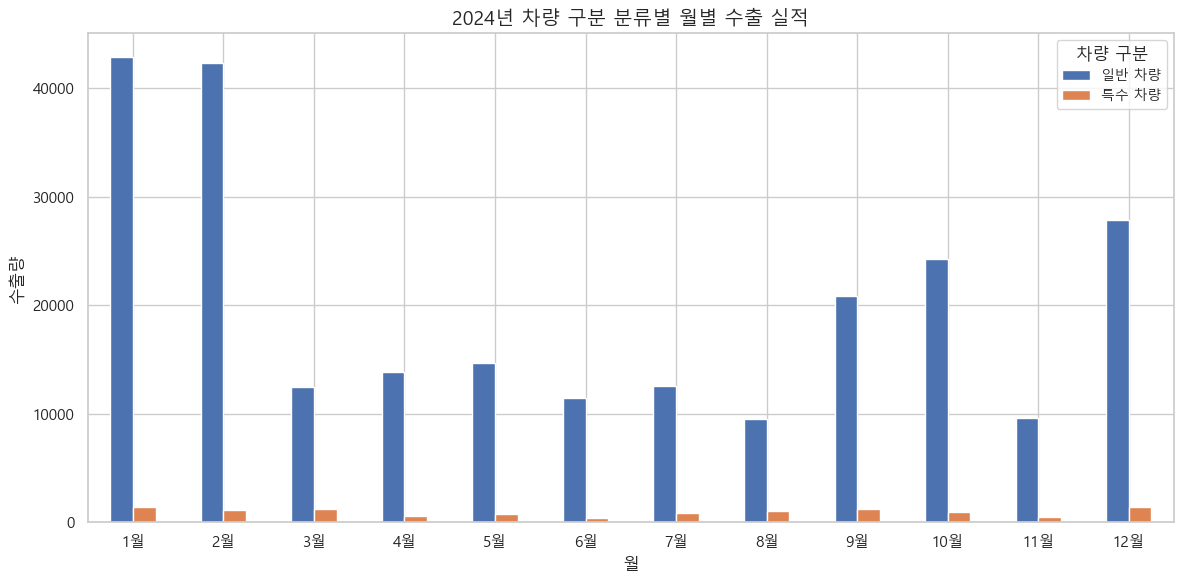

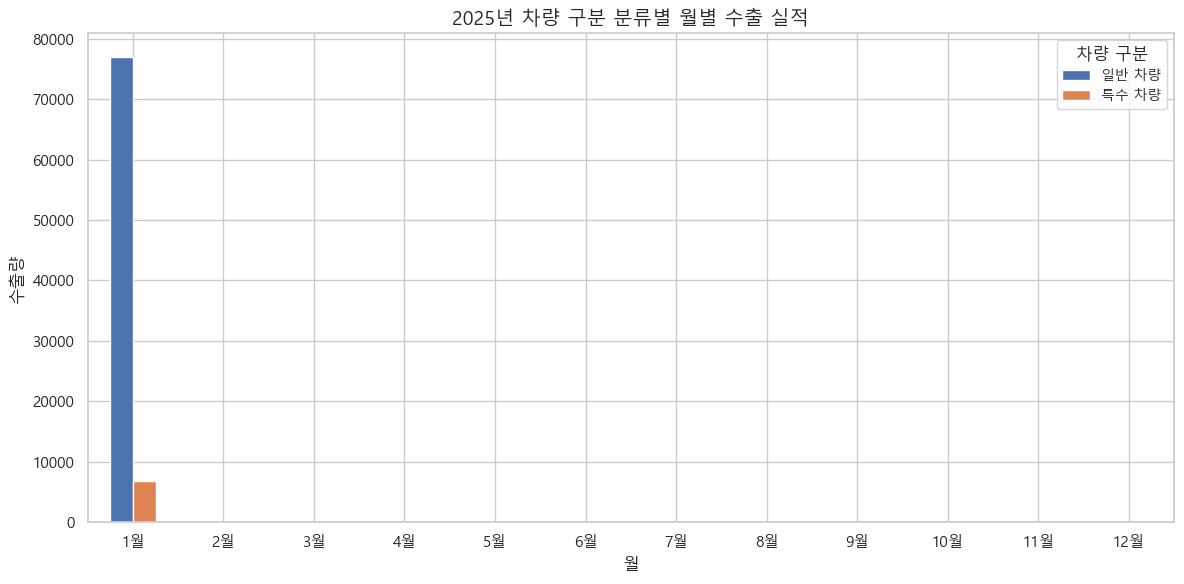

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
df_country = pd.read_csv("기아_지역별수출실적_전처리.CSV")

# 1. 차량 구분 분류 컬럼 추가
general_types = ['승용차', '휴양용 차량', '상업용 차량', '총합']
df_country['차량 구분 분류'] = df_country['차량 구분'].apply(
    lambda x: '일반 차량' if x in general_types else '특수 차량'
)

# 2. 월별 컬럼 정의 및 숫자형 변환
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월',
              '7월', '8월', '9월', '10월', '11월', '12월']
df_country[month_cols] = df_country[month_cols].apply(pd.to_numeric, errors='coerce')

# 3. 연도 & 차량 구분 분류 기준으로 월별 수출 합계 계산
df_monthly = df_country.groupby(['연도', '차량 구분 분류'])[month_cols].sum().reset_index()

# 4. 시각화: 연도별로 월별 수출 실적 비교
for year in df_monthly['연도'].unique():
    df_plot = df_monthly[df_monthly['연도'] == year].set_index('차량 구분 분류')[month_cols].T

    df_plot.plot(kind='bar', figsize=(12, 6))
    plt.title(f"{year}년 차량 구분 분류별 월별 수출 실적", fontsize=14)
    plt.xlabel("월", fontsize=12)
    plt.ylabel("수출량", fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title="차량 구분", fontsize=10)
    plt.tight_layout()
    plt.show()


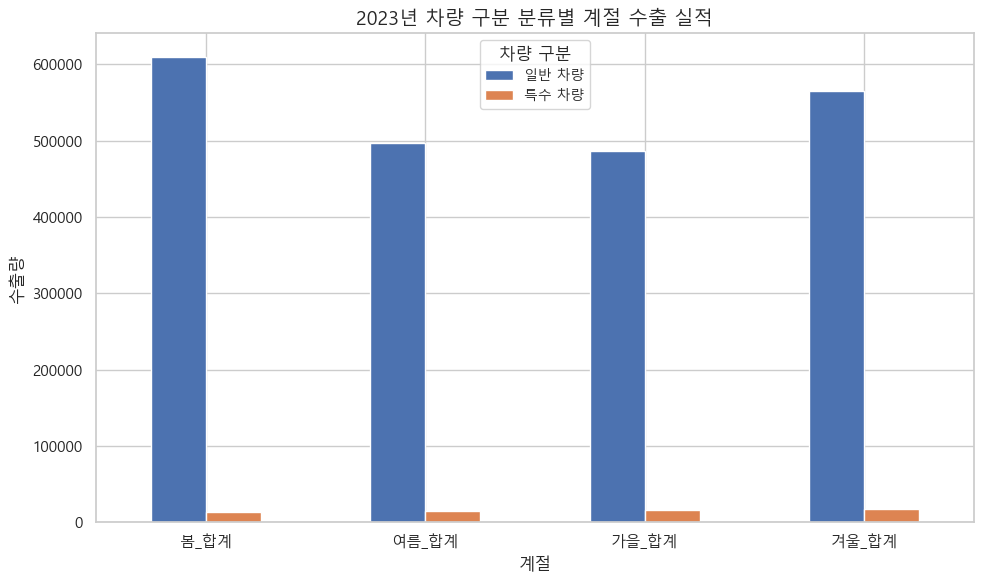

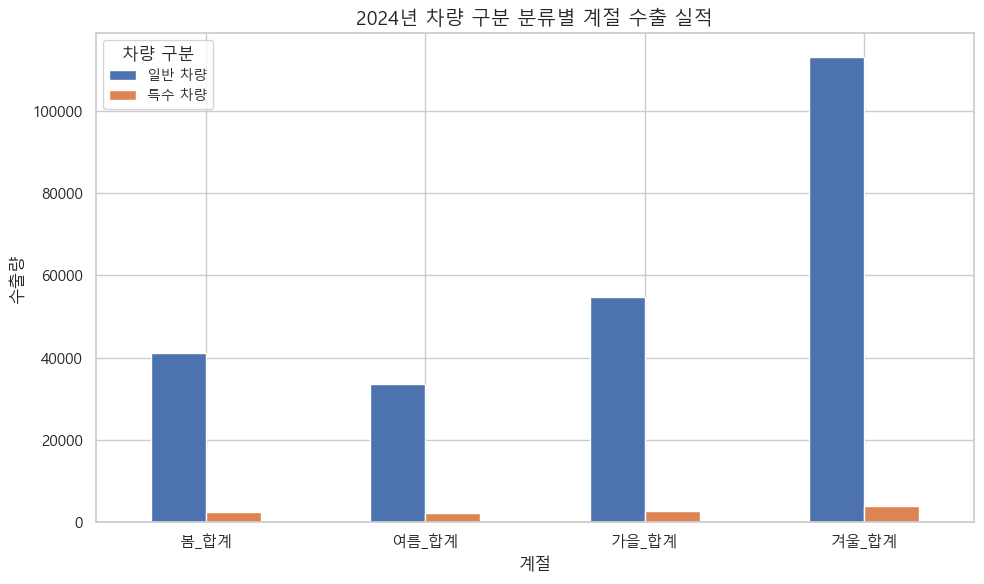

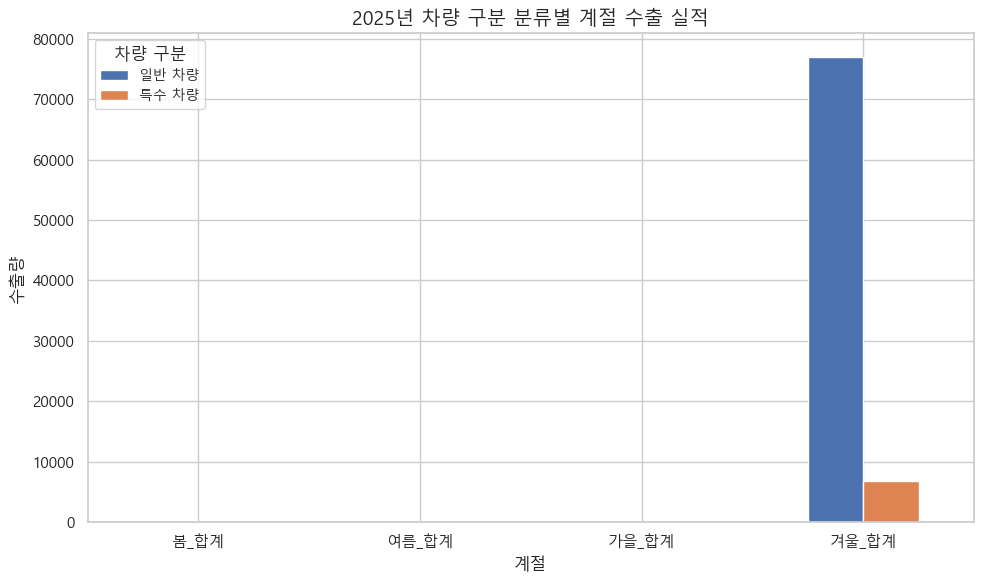

In [102]:
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월',
              '7월', '8월', '9월', '10월', '11월', '12월']
df_country[month_cols] = df_country[month_cols].apply(pd.to_numeric, errors='coerce')

# 5. 계절 정의
season_months = {
    '봄': ['3월', '4월', '5월'],
    '여름': ['6월', '7월', '8월'],
    '가을': ['9월', '10월', '11월'],
    '겨울': ['12월', '1월', '2월']
}

# 6. 계절별 합계 컬럼 생성
for season, months in season_months.items():
    df_country[f'{season}_합계'] = df_country[months].sum(axis=1)

# 7. 계절별 수출 실적 집계 (연도, 차량 구분 분류 기준)
season_cols = [f'{s}_합계' for s in season_months]
df_seasonal = df_country.groupby(['연도', '차량 구분 분류'])[season_cols].sum().reset_index()

# 8. 시각화: 계절별 그래프 (연도별로 분리)
for year in df_seasonal['연도'].unique():
    df_plot = df_seasonal[df_seasonal['연도'] == year].set_index('차량 구분 분류')[season_cols].T

    df_plot.plot(kind='bar', figsize=(10, 6))
    plt.title(f"{year}년 차량 구분 분류별 계절 수출 실적", fontsize=14)
    plt.xlabel("계절", fontsize=12)
    plt.ylabel("수출량", fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title="차량 구분", fontsize=10)
    plt.tight_layout()
    plt.show()

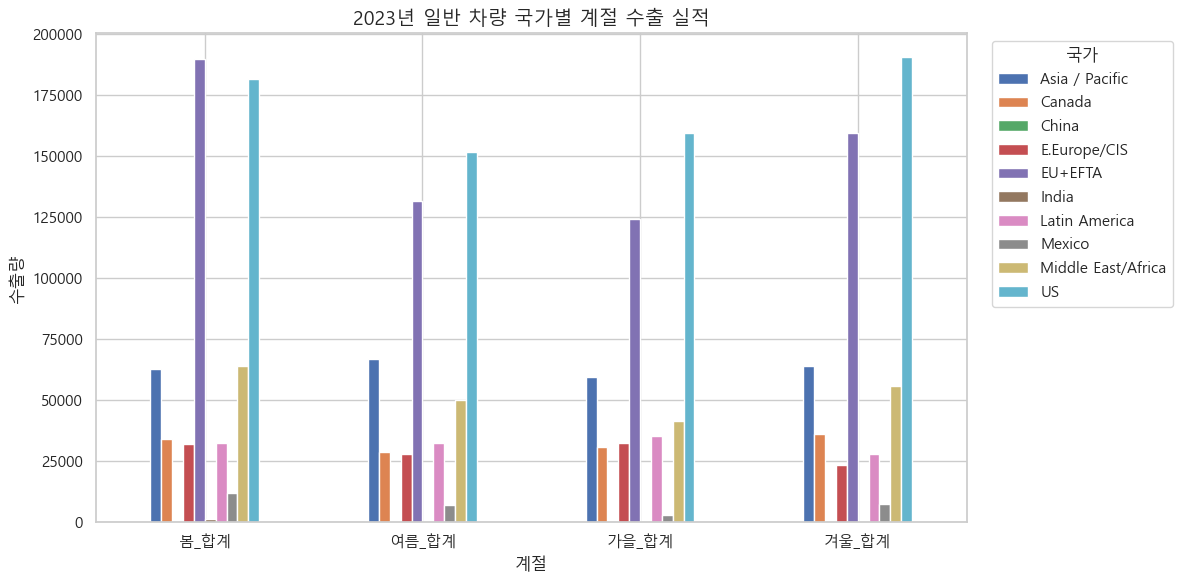

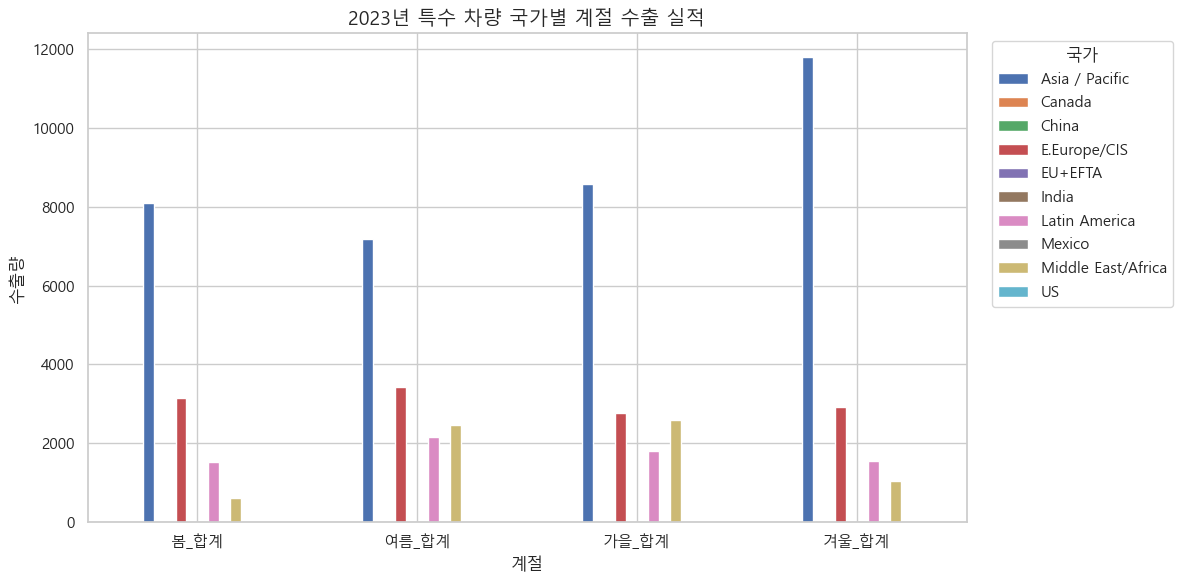

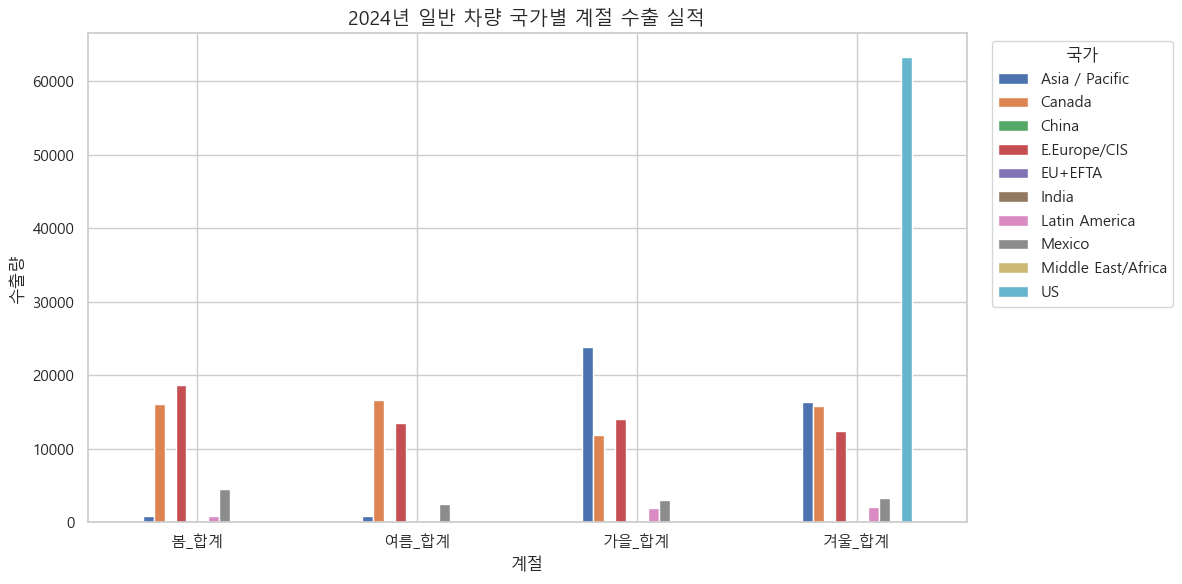

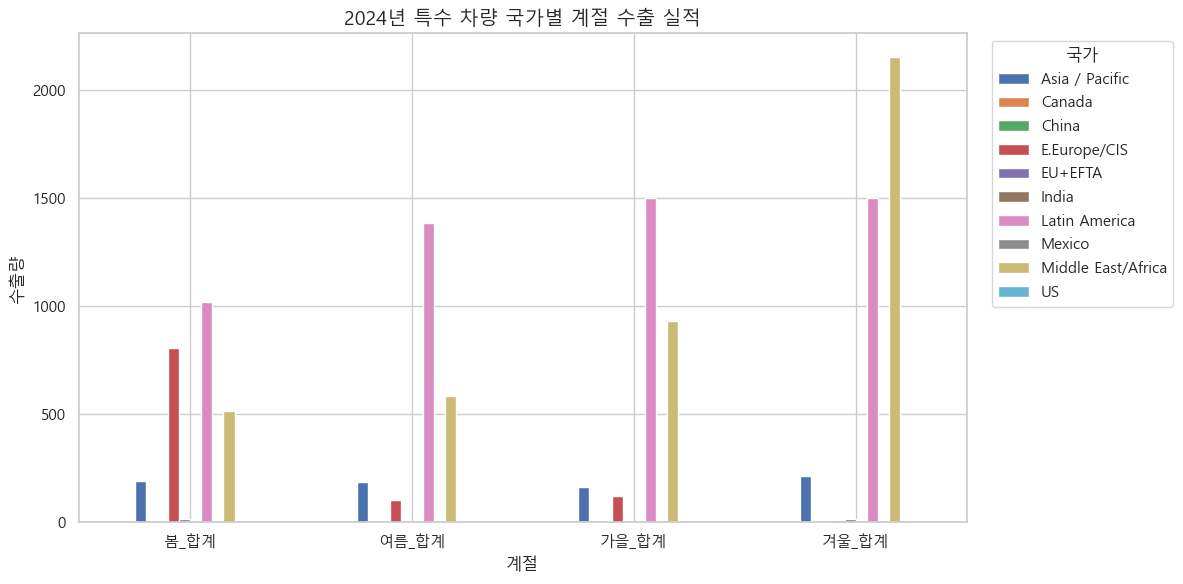

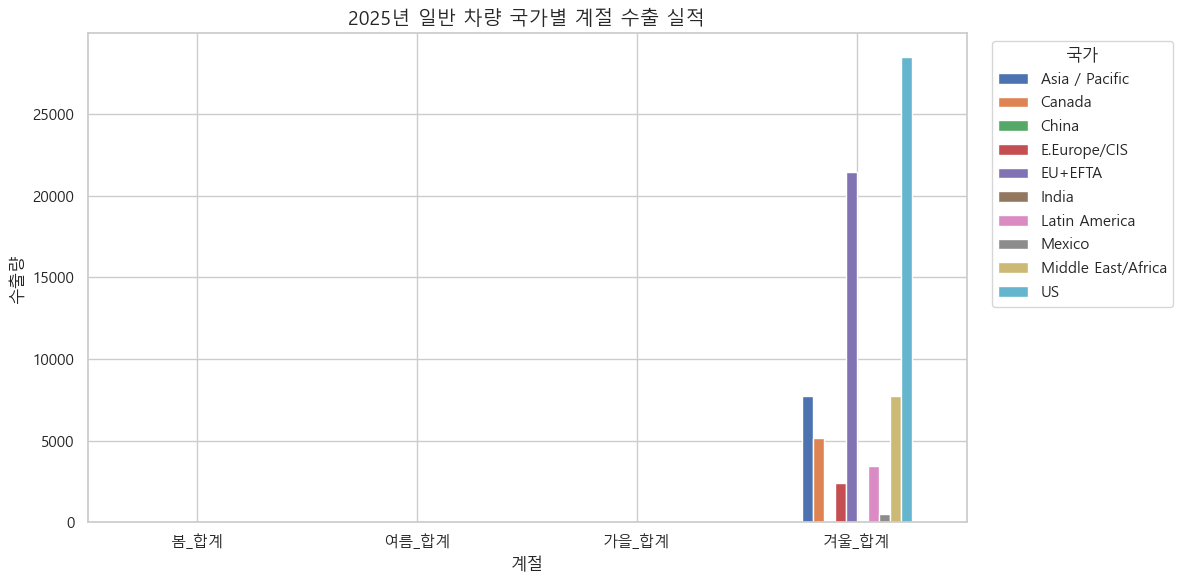

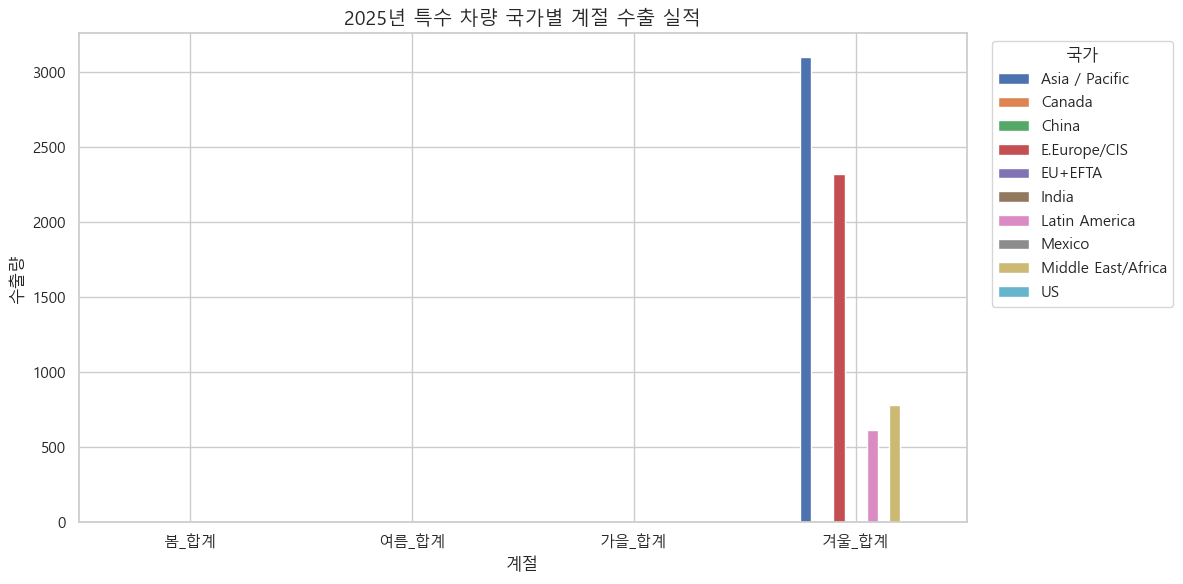

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm

# 1. 한글 폰트 설정 (운영체제별)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:  # Linux (ex. Colab)
    import subprocess
    subprocess.run(['apt-get', '-qq', 'install', 'fonts-nanum'], check=True)
    fm._rebuild()
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 불러오기
df_country = pd.read_csv("기아_지역별수출실적_전처리.CSV")

# 3. 차량 구분 분류 컬럼 추가
general_types = ['승용차', '휴양용 차량', '상업용 차량', '총합']
df_country['차량 구분 분류'] = df_country['차량 구분'].apply(
    lambda x: '일반 차량' if x in general_types else '특수 차량'
)

# 4. 월별 수치 숫자형 변환
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월',
              '7월', '8월', '9월', '10월', '11월', '12월']
df_country[month_cols] = df_country[month_cols].apply(pd.to_numeric, errors='coerce')

# 5. 계절별 합계 계산
season_months = {
    '봄': ['3월', '4월', '5월'],
    '여름': ['6월', '7월', '8월'],
    '가을': ['9월', '10월', '11월'],
    '겨울': ['12월', '1월', '2월']
}
for season, months in season_months.items():
    df_country[f'{season}_합계'] = df_country[months].sum(axis=1)

# 6. 국가별 + 연도 + 차량 구분 분류 기준으로 계절 수출 실적 집계
season_cols = [f'{s}_합계' for s in season_months]
df_grouped_by_country = df_country.groupby(['국가명', '연도', '차량 구분 분류'])[season_cols].sum().reset_index()

# 7. 시각화: 국가별 계절별 그래프 (연도별 & 차량 구분별로 나눠 그림)
for (year, car_type), group in df_grouped_by_country.groupby(['연도', '차량 구분 분류']):
    df_plot = group.set_index('국가명')[season_cols].T

    df_plot.plot(kind='bar', figsize=(12, 6))
    plt.title(f"{year}년 {car_type} 국가별 계절 수출 실적", fontsize=14)
    plt.xlabel("계절", fontsize=12)
    plt.ylabel("수출량", fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title="국가", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


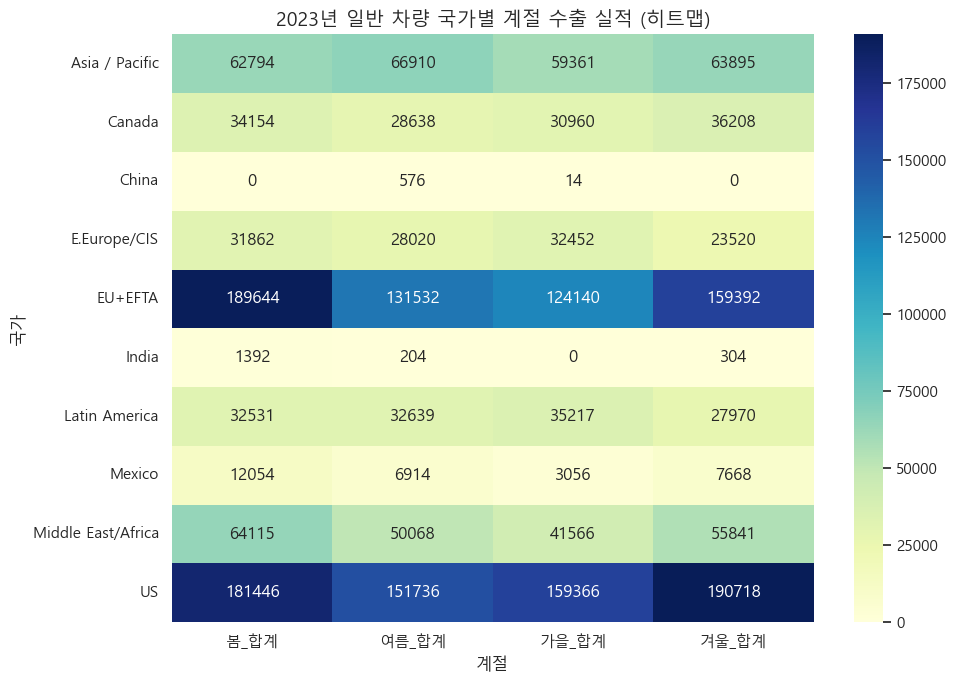

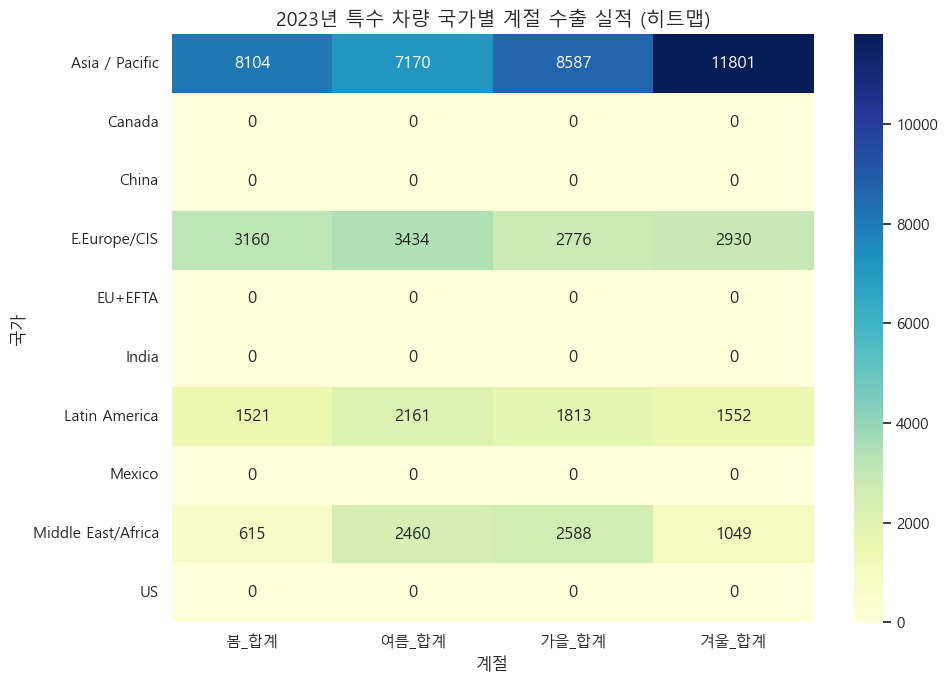

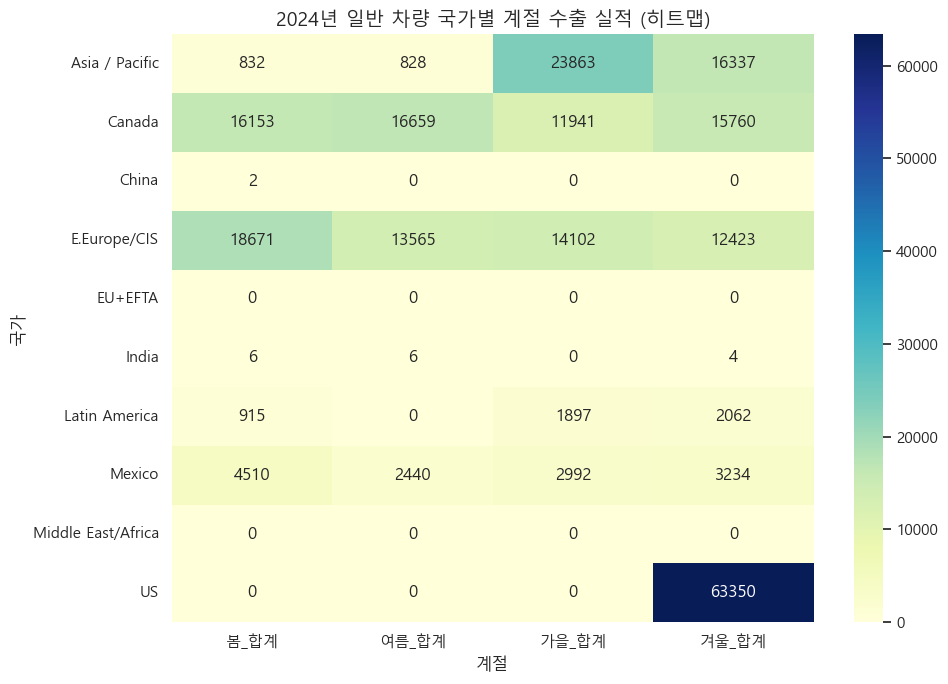

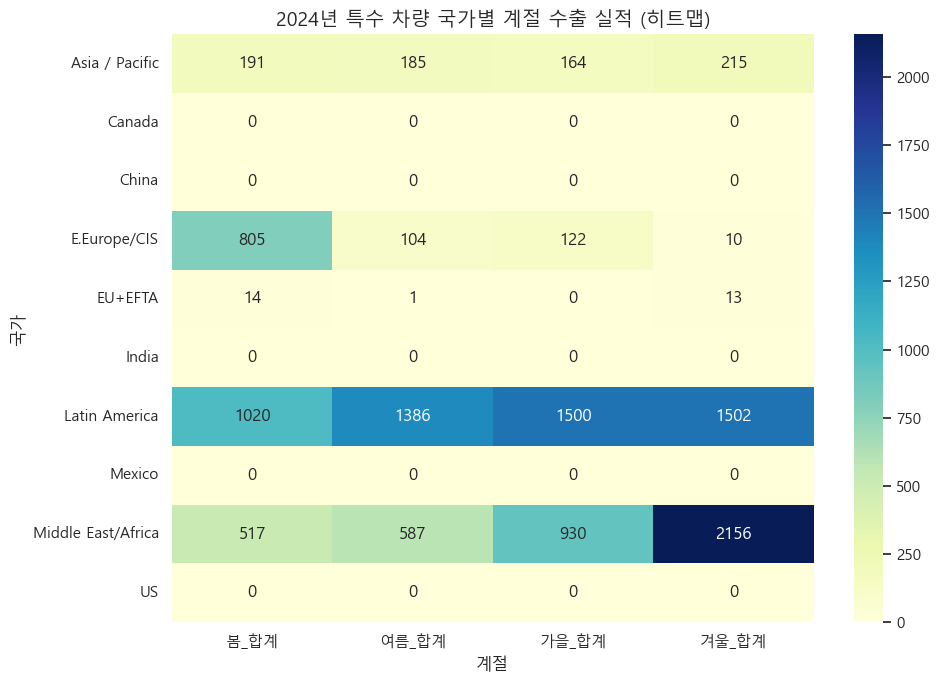

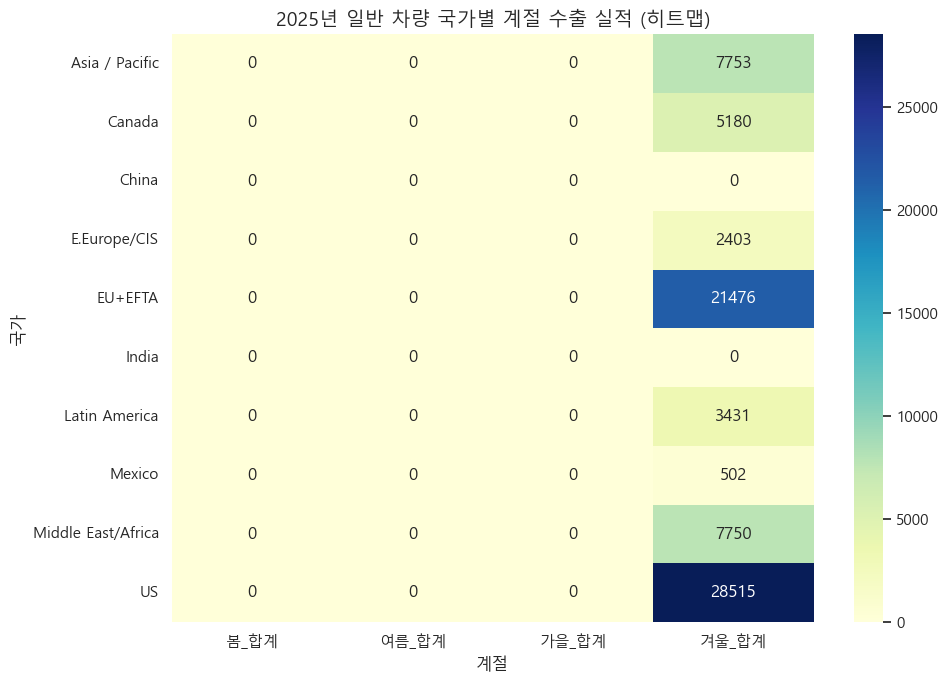

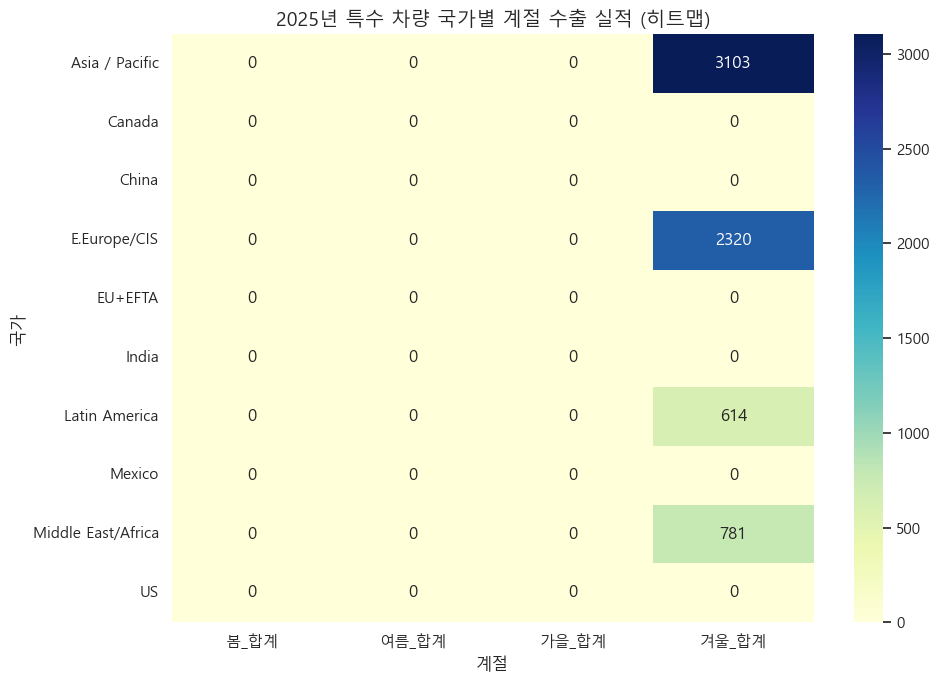

In [132]:
import seaborn as sns

for (year, car_type), group in df_grouped_by_country.groupby(['연도', '차량 구분 분류']):
    df_heat = group.set_index('국가명')[season_cols]

    plt.figure(figsize=(10, len(df_heat) * 0.5 + 2))
    sns.heatmap(df_heat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title(f"{year}년 {car_type} 국가별 계절 수출 실적 (히트맵)", fontsize=14)
    plt.xlabel("계절")
    plt.ylabel("국가")
    plt.tight_layout()
    plt.show()


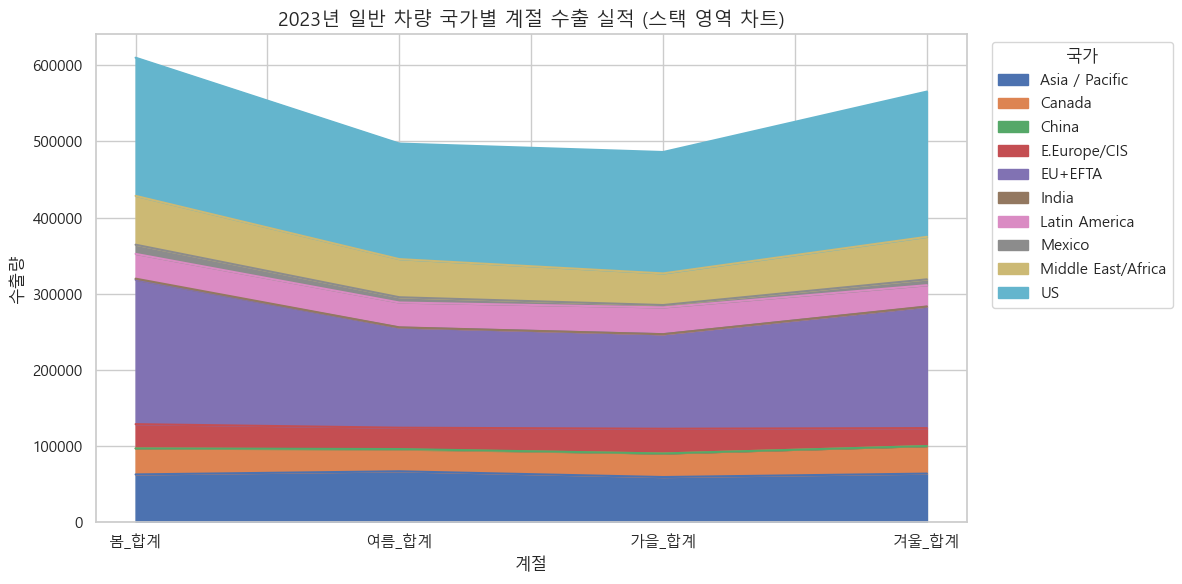

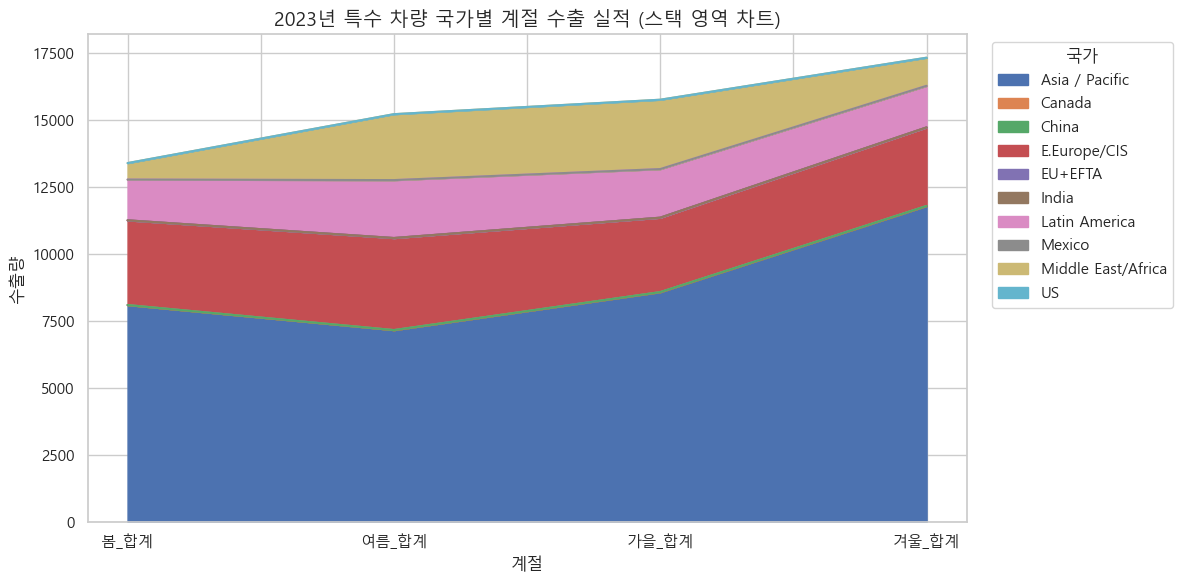

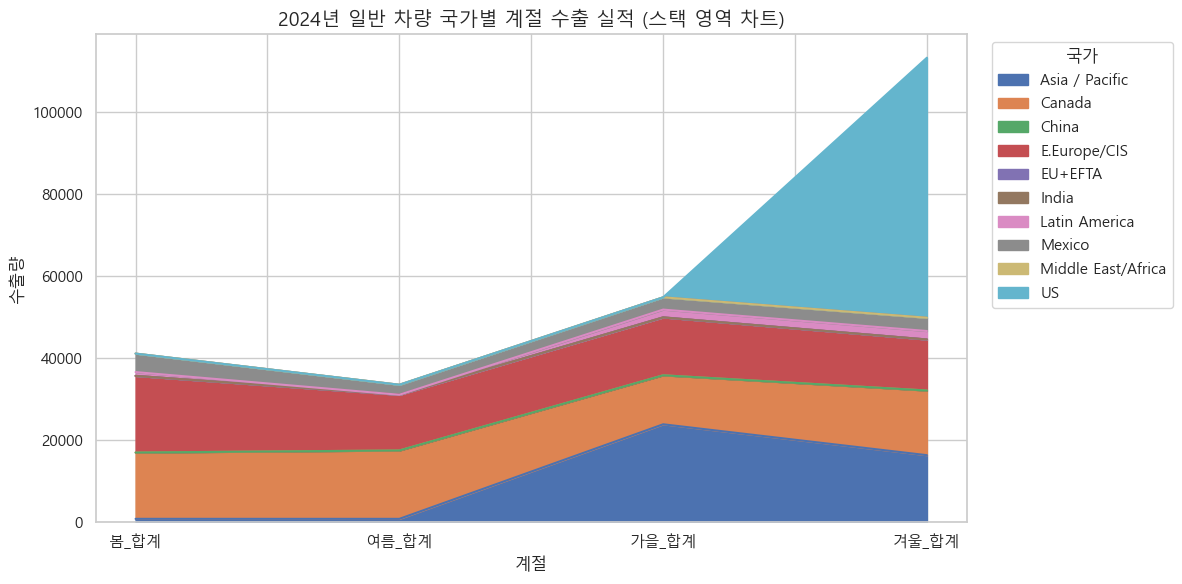

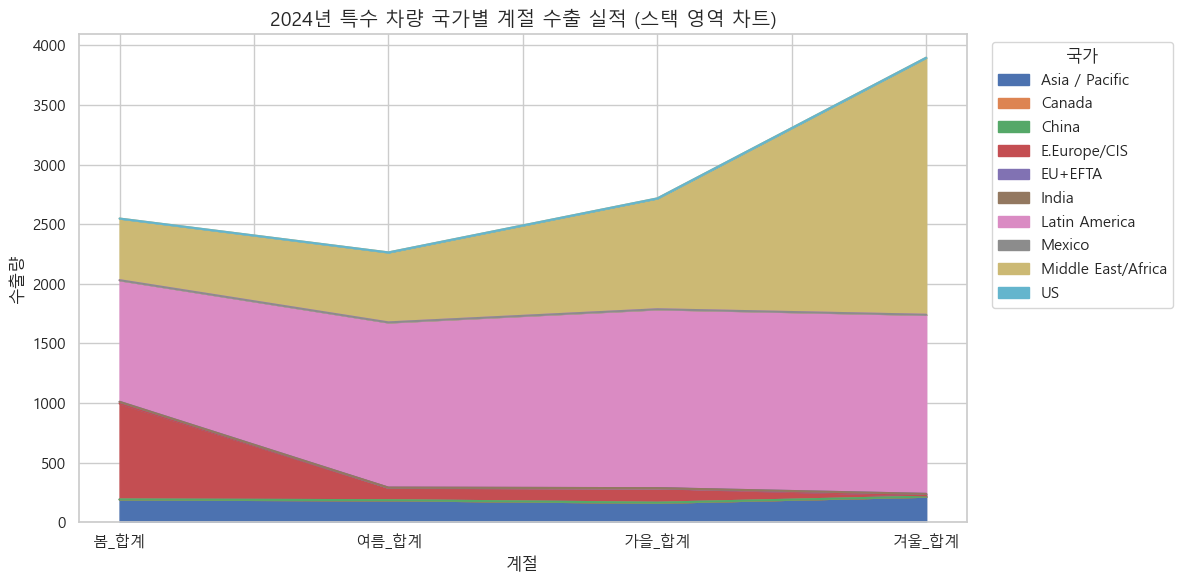

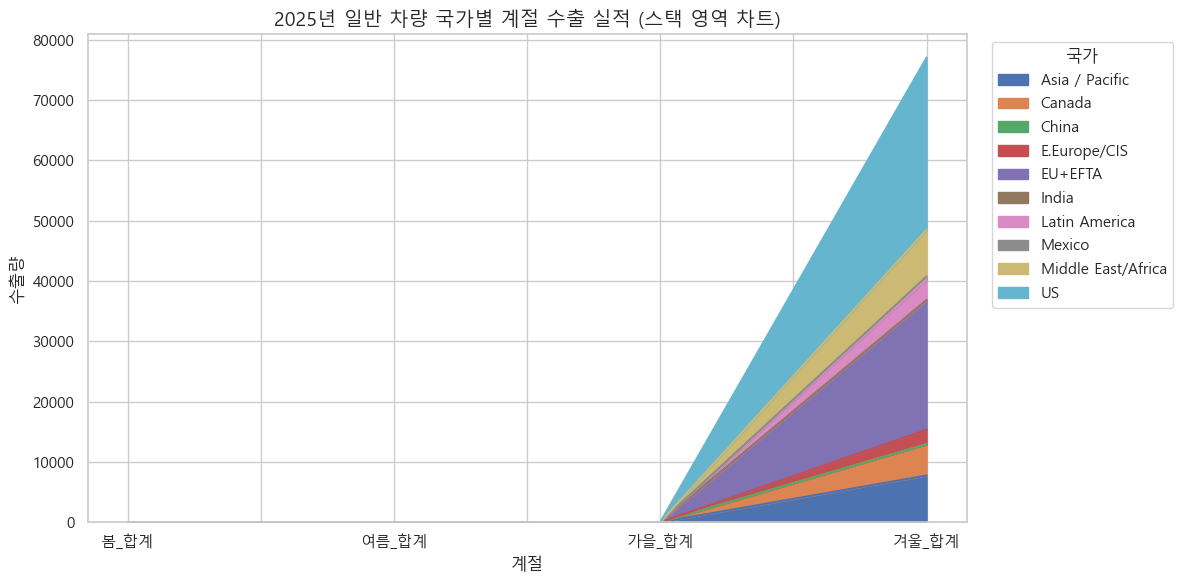

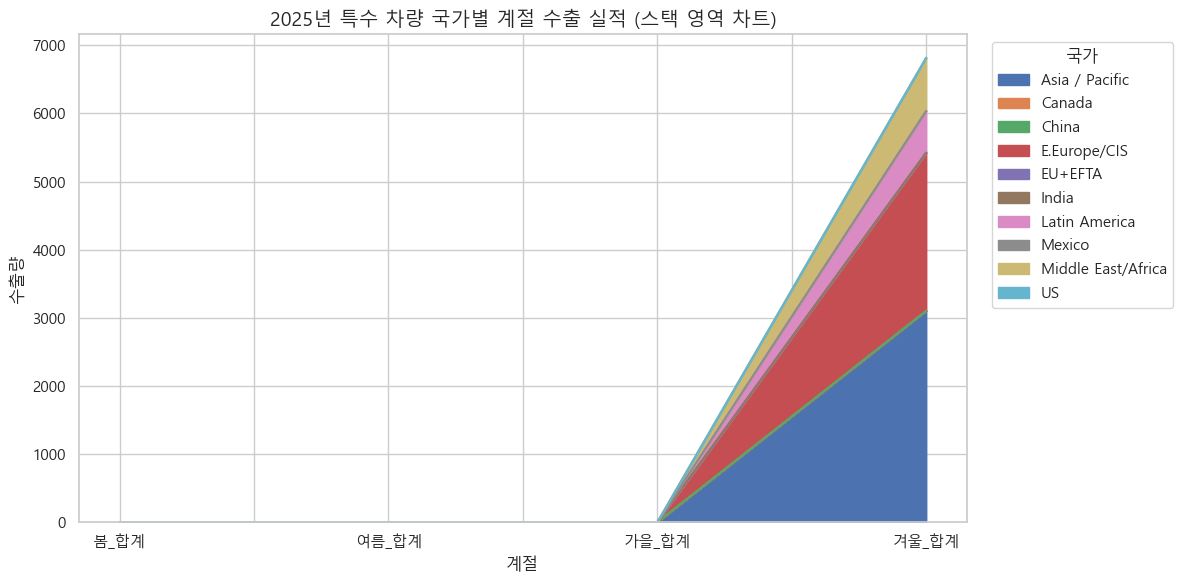

In [133]:
for (year, car_type), group in df_grouped_by_country.groupby(['연도', '차량 구분 분류']):
    df_plot = group.set_index('국가명')[season_cols].T

    df_plot.plot(kind='area', stacked=True, figsize=(12, 6))
    plt.title(f"{year}년 {car_type} 국가별 계절 수출 실적 (스택 영역 차트)", fontsize=14)
    plt.xlabel("계절")
    plt.ylabel("수출량")
    plt.legend(title="국가", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [134]:
df

,차량 구분,국가명,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도,차량 구분 분류
0,승용차,US,1048.0,633.0,627.0,245.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,5.0,2023,일반 차량
1,휴양용 차량,US,33056.0,29697.0,31985.0,29103.0,28763.0,26013.0,27234.0,22619.0,20969.0,24759.0,33951.0,30920.0,2023,일반 차량
2,상업용 차량,US,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2023,일반 차량
3,특수 차량,US,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,2023,특수 차량
4,CKD(모듈형 조립 방식),US,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2023,특수 차량
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,휴양용 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,일반 차량
186,상업용 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,일반 차량
187,특수 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,특수 차량
188,CKD(특수 차량 제외),China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,특수 차량


In [135]:
df1

,차종,차량 구분,거래 유형,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도
0,Morning,일반 차량,국내,1813.0,2049.0,2127.0,2164.0,2502.0,2245.0,2033.0,2910.0,1892.0,2225.0,2111.0,1808.0,2023
1,Ray,일반 차량,국내,3585.0,4268.0,4155.0,4158.0,4576.0,4372.0,4285.0,4402.0,3464.0,4824.0,4587.0,4254.0,2023
2,K3,일반 차량,국내,950.0,1024.0,1197.0,670.0,975.0,1540.0,976.0,1123.0,1036.0,939.0,1428.0,1346.0,2023
3,K5,일반 차량,국내,2560.0,2653.0,3421.0,2739.0,3166.0,2963.0,2246.0,2613.0,2280.0,2592.0,3783.0,3563.0,2023
4,Stinger,일반 차량,국내,113.0,120.0,143.0,61.0,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,PV5,일반 차량,수출,0,0,0,0,0,0,0,0,0,0,0,0,2025
143,Tasman,특수 차량,수출,0,0,0,0,0,0,0,0,0,0,0,0,2025
144,Military,특수 차량,수출,0,0,0,0,0,0,0,0,0,0,0,0,2025
145,Bongo,특수 차량,수출,17,0,0,0,0,0,0,0,0,0,0,0,2025


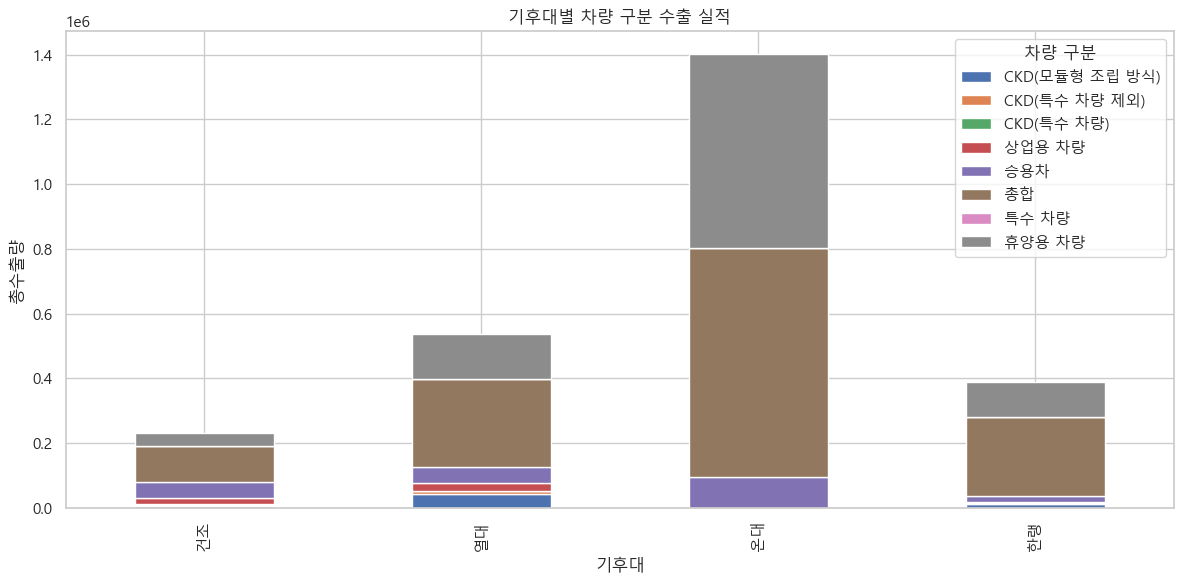

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df_country = pd.read_csv("D:\manifest-mini\hoyeon\기아_지역별수출실적_전처리.CSV")

# 2. 국가별 기후대 매핑
climate_map = {
    'US': '온대',
    'Canada': '한랭',
    'India': '열대',
    'EU+EFTA': '온대',
    'Mexico': '열대',
    'Middle East/Africa': '건조',
    'China': '온대',
    'Asia / Pacific': '열대',
    'Latin America': '열대',
    'E.Europe/CIS': '한랭',
}
df_country['기후대'] = df_country['국가명'].map(climate_map)

# 3. 차량 구분 분류 컬럼 추가
general_types = ['승용차', '휴양용 차량', '상업용 차량', '총합']
df_country['차량 구분 분류'] = df_country['차량 구분'].apply(
    lambda x: '일반 차량' if x in general_types else '특수 차량'
)

# 4. 월별 수치형 변환 및 총수출량 계산
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월',
              '7월', '8월', '9월', '10월', '11월', '12월']
df_country[month_cols] = df_country[month_cols].apply(pd.to_numeric, errors='coerce')
df_country['총수출량'] = df_country[month_cols].sum(axis=1)

# 5. 기후대 + 차량 구분 기준 집계
df_summary = df_country.groupby(['기후대', '차량 구분'])['총수출량'].sum().reset_index()

# 6. 피벗 테이블로 변환 (기후대 = 행, 차량 구분 = 열)
df_pivot = df_summary.pivot(index='기후대', columns='차량 구분', values='총수출량').fillna(0)

# 7. 시각화: 누적 막대그래프
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("기후대별 차량 구분 수출 실적")
plt.xlabel("기후대")
plt.ylabel("총수출량")
plt.legend(title="차량 구분")
plt.tight_layout()
plt.show()


In [137]:
df

,차량 구분,국가명,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도,차량 구분 분류
0,승용차,US,1048.0,633.0,627.0,245.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,5.0,2023,일반 차량
1,휴양용 차량,US,33056.0,29697.0,31985.0,29103.0,28763.0,26013.0,27234.0,22619.0,20969.0,24759.0,33951.0,30920.0,2023,일반 차량
2,상업용 차량,US,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2023,일반 차량
3,특수 차량,US,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,2023,특수 차량
4,CKD(모듈형 조립 방식),US,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2023,특수 차량
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,휴양용 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,일반 차량
186,상업용 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,일반 차량
187,특수 차량,China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,특수 차량
188,CKD(특수 차량 제외),China,0.0,0,0,0,0,0,0,0,0,0,0,0,2025,특수 차량


In [138]:
df1

,차종,차량 구분,거래 유형,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도
0,Morning,일반 차량,국내,1813.0,2049.0,2127.0,2164.0,2502.0,2245.0,2033.0,2910.0,1892.0,2225.0,2111.0,1808.0,2023
1,Ray,일반 차량,국내,3585.0,4268.0,4155.0,4158.0,4576.0,4372.0,4285.0,4402.0,3464.0,4824.0,4587.0,4254.0,2023
2,K3,일반 차량,국내,950.0,1024.0,1197.0,670.0,975.0,1540.0,976.0,1123.0,1036.0,939.0,1428.0,1346.0,2023
3,K5,일반 차량,국내,2560.0,2653.0,3421.0,2739.0,3166.0,2963.0,2246.0,2613.0,2280.0,2592.0,3783.0,3563.0,2023
4,Stinger,일반 차량,국내,113.0,120.0,143.0,61.0,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,PV5,일반 차량,수출,0,0,0,0,0,0,0,0,0,0,0,0,2025
143,Tasman,특수 차량,수출,0,0,0,0,0,0,0,0,0,0,0,0,2025
144,Military,특수 차량,수출,0,0,0,0,0,0,0,0,0,0,0,0,2025
145,Bongo,특수 차량,수출,17,0,0,0,0,0,0,0,0,0,0,0,2025


In [139]:
import pandas as pd

# 파일 불러오기
df_model = pd.read_csv("D:\manifest-mini\hoyeon\기아_차종별판매실적_전처리.CSV")

# 차종 → 차량 구분 매핑 테이블 (사용자 지정 8가지 분류 기준)
model_to_class = {
    'K3': '승용차',
    'K5': '승용차',
    'K7': '승용차',
    'K9': '승용차',
    'Stinger': '승용차',
    'Morning': '승용차',
    'Ray': '승용차',
    'EV6': '승용차',
    'EV9': '승용차',
    'Sportage': '휴양용 차량',
    'Sorento': '휴양용 차량',
    'Carnival': '휴양용 차량',
    'Mohave': '휴양용 차량',
    'Seltos': '휴양용 차량',
    'Niro': '휴양용 차량',
    'Niro Plus': '휴양용 차량',
    'Bongo': '상업용 차량',
    'Bus': '상업용 차량',
    'Military': '특수 차량',
    'Millitary': '특수 차량',
    'CKD(모듈형 조립 방식)': 'CKD(모듈형 조립 방식)',
    'CKD(특수 차량 제외)': 'CKD(특수 차량 제외)',
    'CKD(특수 차량)': 'CKD(특수 차량)',
    '총합': '총합',
    'Morning / Picanto': '승용차',
    'K7 / K8': '승용차',
    'K5 / Optima': '승용차',
    'Carnival / Sedona': '휴양용 차량',
    'Mohave / Borrego': '휴양용 차량',
    'Niro / Niro Plus': '휴양용 차량',
    'Pride / Rio': '승용차',
    'K7 / K8 / Cadenza': '승용차',
    'New Carens': '휴양용 차량',
    'Soul': '승용차',
    "EV3" : "승용차"
,
}

# 차종에서 대표 차종만 추출 (슬래시가 있을 경우 앞부분)
df_model['대표차종'] = df_model['차종'].str.split('/').str[0].str.strip()

# 대표 차종 기준으로 차량 구분 매핑
df_model['차종 분류 (8분류 기준)'] = df_model['대표차종'].map(model_to_class)

# 결과 미리보기
df_model.head(30)


,차종,차량 구분,거래 유형,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도,대표차종,차종 분류 (8분류 기준)
0,Morning,일반 차량,국내,1813.0,2049.0,2127.0,2164.0,2502.0,2245.0,2033.0,2910.0,1892.0,2225.0,2111.0,1808.0,2023,Morning,승용차
1,Ray,일반 차량,국내,3585.0,4268.0,4155.0,4158.0,4576.0,4372.0,4285.0,4402.0,3464.0,4824.0,4587.0,4254.0,2023,Ray,승용차
2,K3,일반 차량,국내,950.0,1024.0,1197.0,670.0,975.0,1540.0,976.0,1123.0,1036.0,939.0,1428.0,1346.0,2023,K3,승용차
3,K5,일반 차량,국내,2560.0,2653.0,3421.0,2739.0,3166.0,2963.0,2246.0,2613.0,2280.0,2592.0,3783.0,3563.0,2023,K5,승용차
4,Stinger,일반 차량,국내,113.0,120.0,143.0,61.0,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,Stinger,승용차
5,K7 / K8,일반 차량,국내,3451.0,4168.0,4569.0,4011.0,4487.0,4469.0,3513.0,2457.0,2406.0,2248.0,2799.0,1859.0,2023,K7,승용차
6,K9,일반 차량,국내,431.0,301.0,432.0,422.0,310.0,366.0,372.0,347.0,232.0,226.0,236.0,223.0,2023,K9,승용차
7,Seltos,일반 차량,국내,3366.0,5552.0,3891.0,4119.0,4792.0,5224.0,4770.0,3512.0,4399.0,3008.0,4446.0,3758.0,2023,Seltos,휴양용 차량
8,Niro,일반 차량,국내,1269.0,1588.0,2219.0,2120.0,1990.0,1992.0,1614.0,1694.0,1681.0,1595.0,1541.0,1256.0,2023,Niro,휴양용 차량
9,Niro Plus,일반 차량,국내,0.0,292.0,460.0,475.0,462.0,298.0,303.0,115.0,103.0,218.0,120.0,70.0,2023,Niro Plus,휴양용 차량


In [140]:
df_model.fillna("승용차", inplace=True)

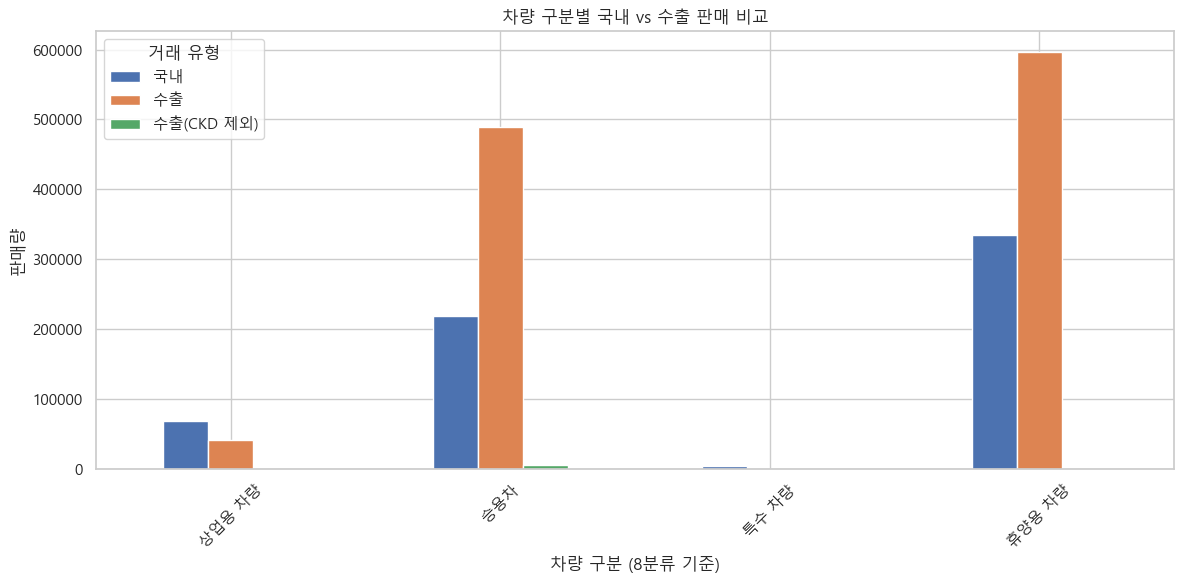

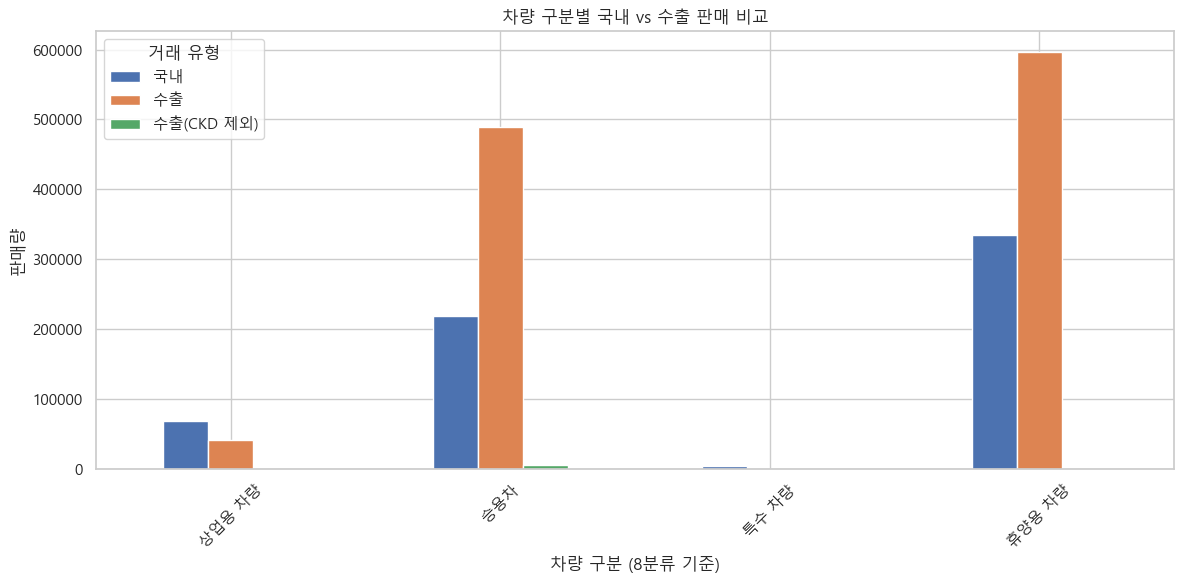

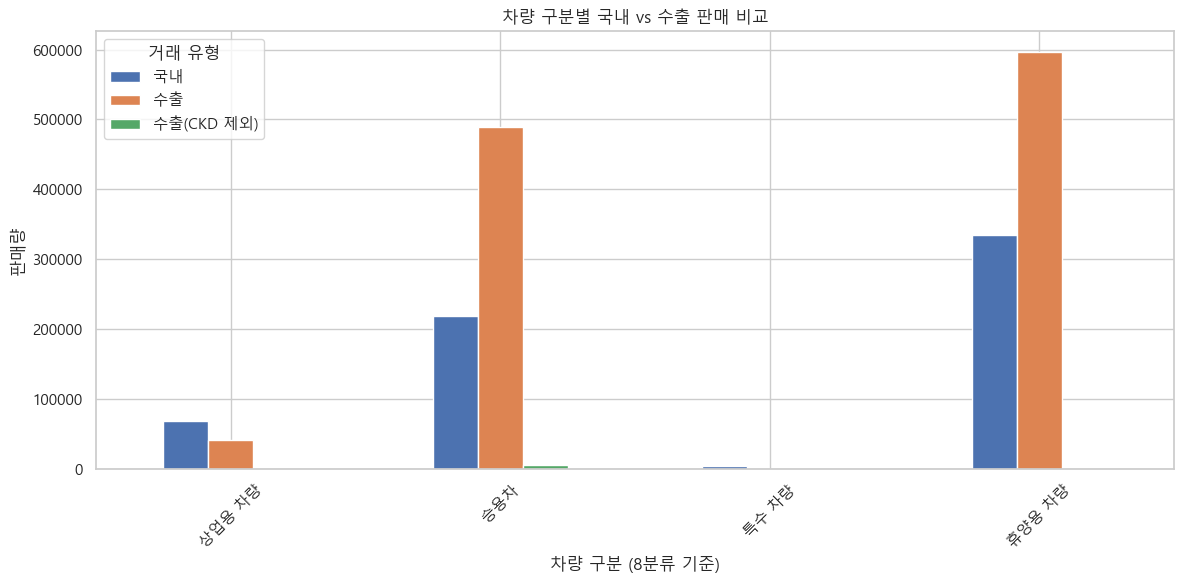

In [143]:
# ✅ 월별 총합 계산
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월',
              '7월', '8월', '9월', '10월', '11월', '12월']
df_model[month_cols] = df_model[month_cols].apply(pd.to_numeric, errors='coerce')
df_model['총수량'] = df_model[month_cols].sum(axis=1)

# ✅ 그룹화: 거래유형(내수/수출) + 차량구분
df_grouped = df_model.groupby(['거래 유형', '차종 분류 (8분류 기준)'])['총수량'].sum().reset_index()
df_pivot = df_grouped.pivot(index='차종 분류 (8분류 기준)', columns='거래 유형', values='총수량').fillna(0)

# ✅ 시각화
df_pivot.plot(kind='bar', figsize=(12, 6))
plt.title("차량 구분별 국내 vs 수출 판매 비교")
plt.xlabel("차량 구분 (8분류 기준)")
plt.ylabel("판매량")
plt.xticks(rotation=45)
plt.legend(title="거래 유형")
plt.tight_layout()
plt.show()

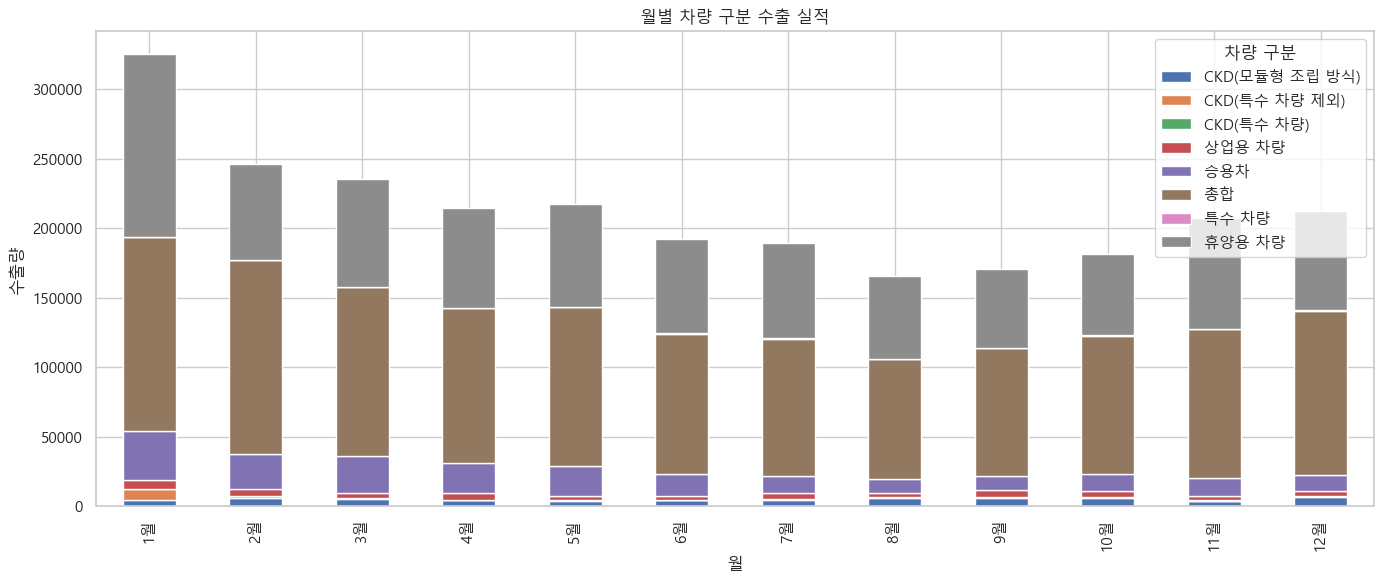

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
file_path = "D:\manifest-mini\hoyeon\기아_지역별수출실적_전처리.CSV"
df_country = pd.read_csv(file_path)

# 2. 차량 구분 분류 컬럼 추가
general_types = ['승용차', '휴양용 차량', '상업용 차량', '총합']
df_country['차량 구분 분류'] = df_country['차량 구분'].apply(
    lambda x: '일반 차량' if x in general_types else '특수 차량'
)

# 3. 월별 수치형 변환
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월',
              '7월', '8월', '9월', '10월', '11월', '12월']
df_country[month_cols] = df_country[month_cols].apply(pd.to_numeric, errors='coerce')

# 4. 차량 구분 기준으로 월별 수출량 합계
df_monthly = df_country.groupby('차량 구분')[month_cols].sum()

# 5. 시각화: 누적 막대그래프 (월별 수출량)
df_monthly.T.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title("월별 차량 구분 수출 실적")
plt.xlabel("월")
plt.ylabel("수출량")
plt.legend(title="차량 구분")
plt.tight_layout()
plt.show()


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2434289528.py:57: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2434289528.py:57: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2434289528.py:57: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2434289528.py:57: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2434289528.py:57: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2434289528.py:57: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Arial.
  plt.tight

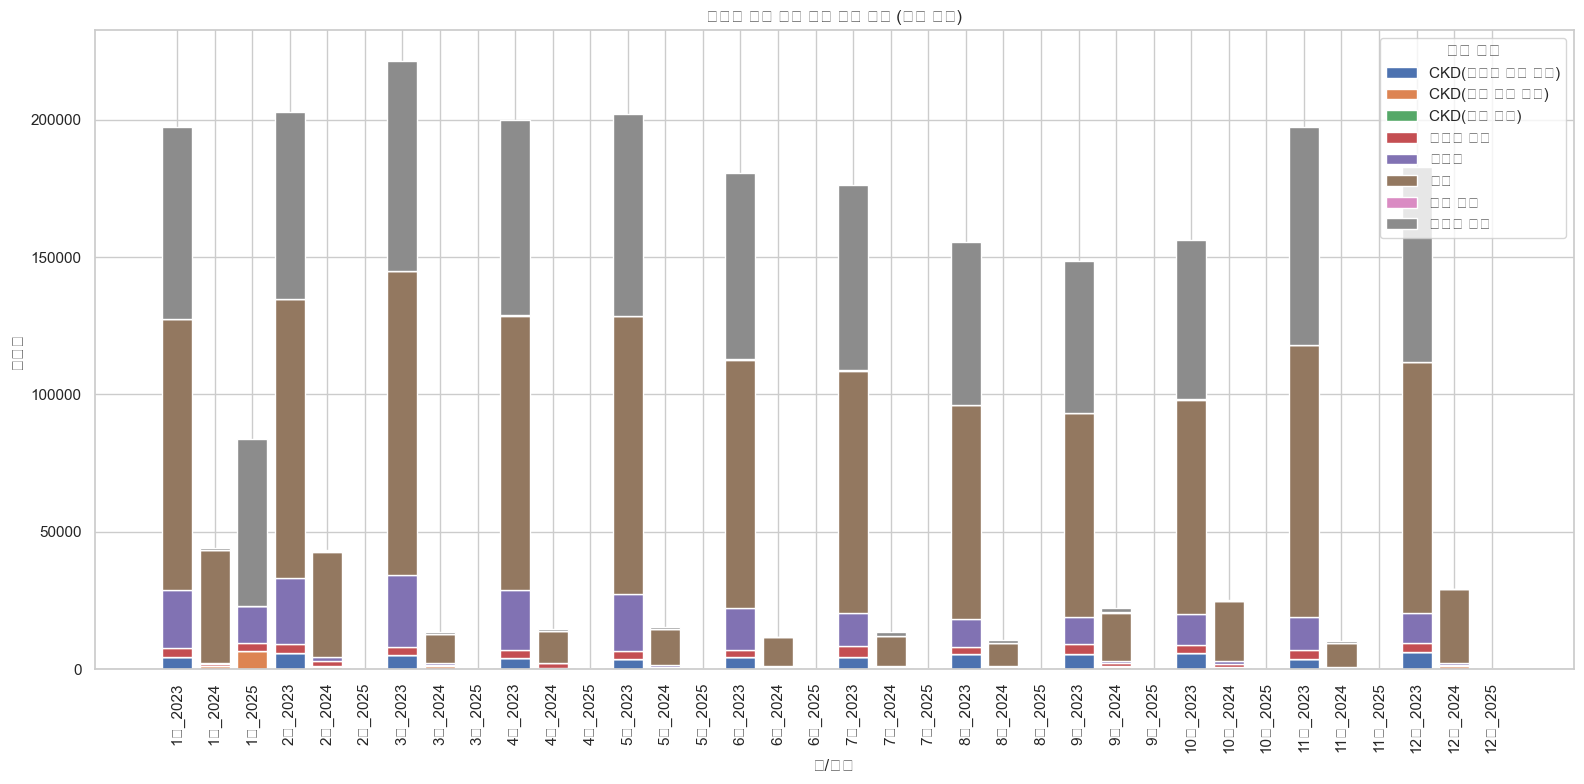

In [ ]:

# 2. 차량 구분 분류 컬럼 추가
general_types = ['승용차', '휴양용 차량', '상업용 차량', '총합']
df_country['차량 구분 분류'] = df_country['차량 구분'].apply(
    lambda x: '일반 차량' if x in general_types else '특수 차량'
)

# 3. 월별 수치형 변환
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월',
              '7월', '8월', '9월', '10월', '11월', '12월']
df_country[month_cols] = df_country[month_cols].apply(pd.to_numeric, errors='coerce')

# 4. 연도 컬럼이 있는지 확인
if '연도' not in df_country.columns:
    raise ValueError("데이터에 '연도' 컬럼이 없습니다. 연도별 비교를 위해 '연도' 컬럼이 필요합니다.")

# 5. 연도와 차량 구분 기준으로 월별 수출량 합계
df_grouped = df_country.groupby(['연도', '차량 구분'])[month_cols].sum()

# 6. 연도별 그래프 생성
for year in df_grouped.index.get_level_values('연도').unique():
    df_year = df_grouped.loc[year]

    # 시각화: 누적 막대그래프
    df_year.T.plot(kind='bar', stacked=True, figsize=(14, 6))
    plt.title(f"{year}년 월별 차량 구분 수출 실적")
    plt.xlabel("월")
    plt.ylabel("수출량")
    plt.legend(title="차량 구분")
    plt.tight_layout()
    plt.show()


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\517821708.py:34: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\517821708.py:34: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\517821708.py:34: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\517821708.py:34: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\517821708.py:34: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\517821708.py:34: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) Arial.
  plt.tight_l

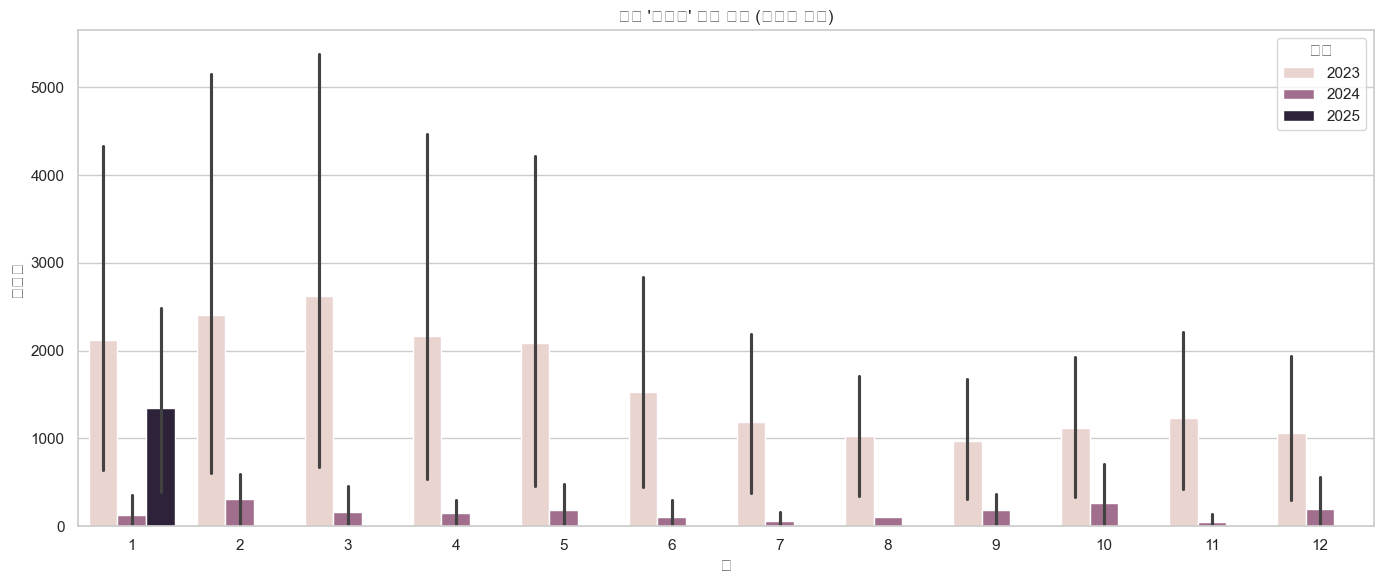

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기
file_path = "D:\manifest-mini\hoyeon\기아_지역별수출실적_전처리.CSV"
df_country = pd.read_csv(file_path)

# 2. 월 컬럼 변환
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월',
              '7월', '8월', '9월', '10월', '11월', '12월']
df_country[month_cols] = df_country[month_cols].apply(pd.to_numeric, errors='coerce')

# 3. melt로 long-form
df_melted = df_country.melt(
    id_vars=['연도', '차량 구분'],
    value_vars=month_cols,
    var_name='월',
    value_name='수출량'
)
df_melted['월'] = df_melted['월'].str.replace('월', '').astype(int)

# 4. 특정 차량 구분만 보기 (예: 승용차)
target_type = '승용차'
df_filtered = df_melted[df_melted['차량 구분'] == target_type]

# 5. 시각화 (월 기준, 연도별 막대 나란히)
plt.figure(figsize=(14, 6))
sns.barplot(data=df_filtered, x='월', y='수출량', hue='연도', dodge=True)
plt.title(f"월별 '{target_type}' 수출 실적 (연도별 비교)")
plt.xlabel("월")
plt.ylabel("수출량")
plt.legend(title="연도")
plt.tight_layout()
plt.show()


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\554978026.py:27: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\554978026.py:27: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\554978026.py:27: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\554978026.py:27: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\554978026.py:27: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\554978026.py:27: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Arial.
  plt.tight_layou

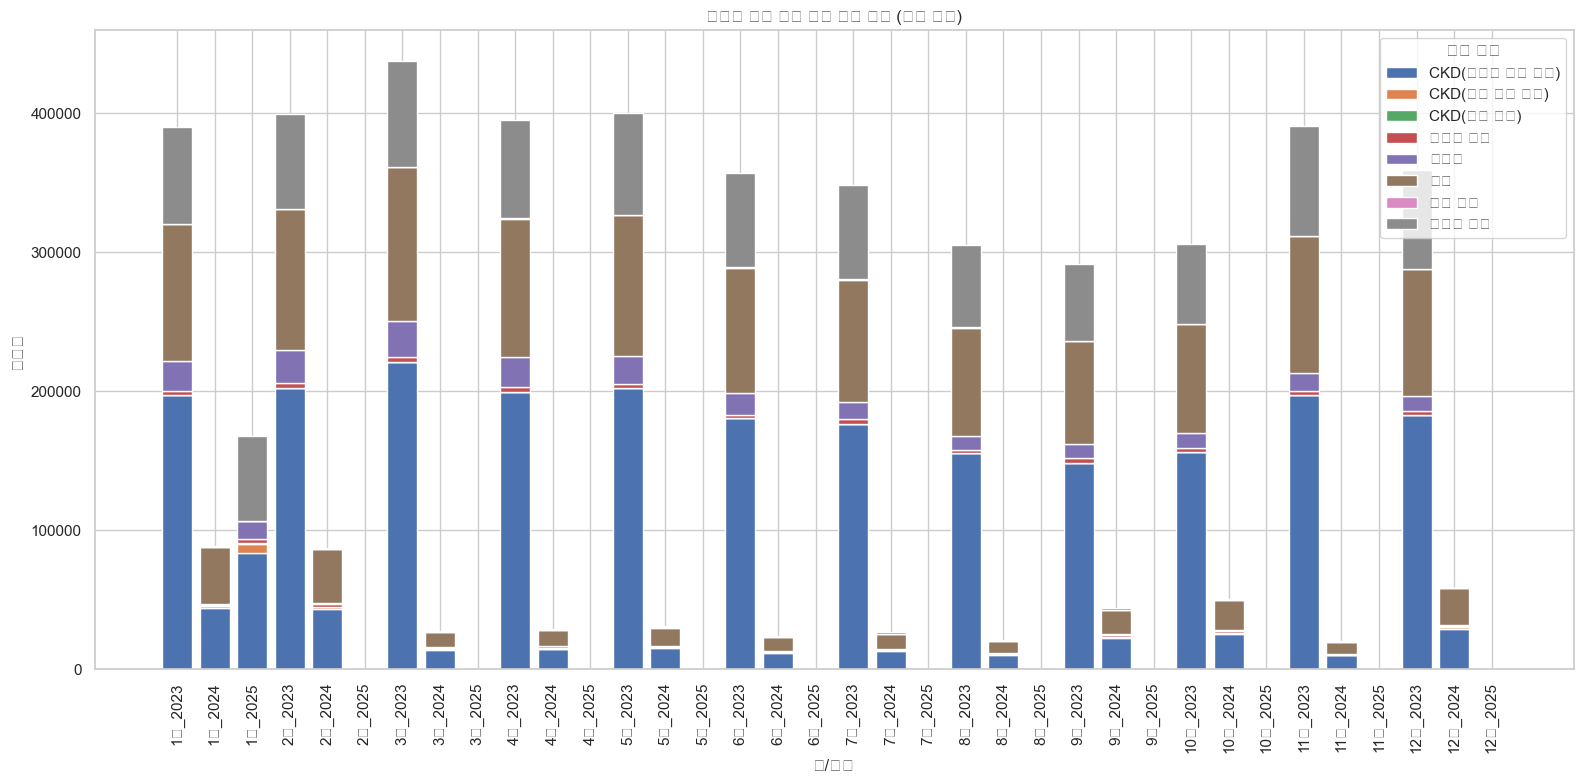

In [115]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 1. 한글 폰트 설정 (예: 'Malgun Gothic' 또는 '맑은 고딕')
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'AppleGothic' (macOS), 'NanumGothic' (Linux)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지

# 2. 시각화 코드 이어서 실행
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# 누적 막대 시각화
bottom = None
for column in df_plot.columns[2:-1]:
    plt.bar(df_plot['월연도'], df_plot[column], label=column, bottom=bottom)
    if bottom is None:
        bottom = df_plot[column]
    else:
        bottom += df_plot[column]

plt.xticks(rotation=90)
plt.title("연도별 월별 차량 구분 수출 실적 (누적 막대)")
plt.xlabel("월/연도")
plt.ylabel("수출량")
plt.legend(title="차량 구분")
plt.tight_layout()
plt.show()


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\703646815.py:23: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\703646815.py:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\703646815.py:23: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\703646815.py:23: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\703646815.py:23: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\703646815.py:23: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  plt.tight_layout(

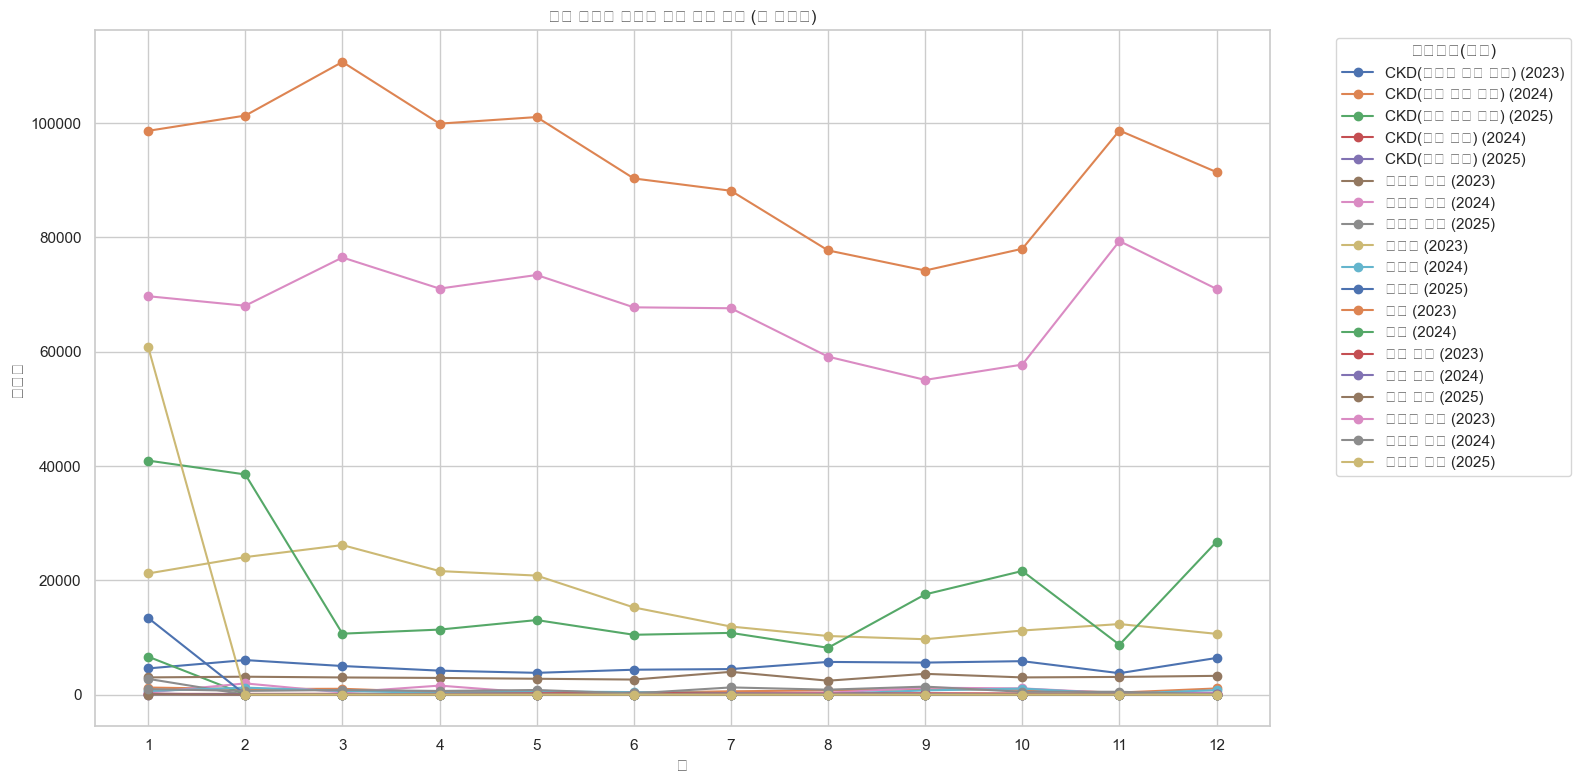

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정 (이미 적용되었는 경우 생략 가능)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비: df_pivot 기반
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# 선 그래프: 차량 구분 + 연도 조합별 선으로 표현
for key, sub_df in df_pivot.groupby('차량 구분'):
    for year, group in sub_df.groupby('연도'):
        plt.plot(group['월'], group['수출량'], label=f"{key} ({year})", marker='o')

# 시각화 설정
plt.title("차량 구분별 연도별 월간 수출 실적 (선 그래프)")
plt.xlabel("월")
plt.ylabel("수출량")
plt.xticks(range(1, 13))  # 1월~12월
plt.legend(title="차량구분(연도)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2711692522.py:22: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2711692522.py:22: UserWarning: Glyph 46280 (\N{HANGUL SYLLABLE DYUL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2711692522.py:22: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2711692522.py:22: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2711692522.py:22: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\vhzkf\AppData\Local\Temp\ipykernel_20056\2711692522.py:22: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) Arial.
  plt.tigh

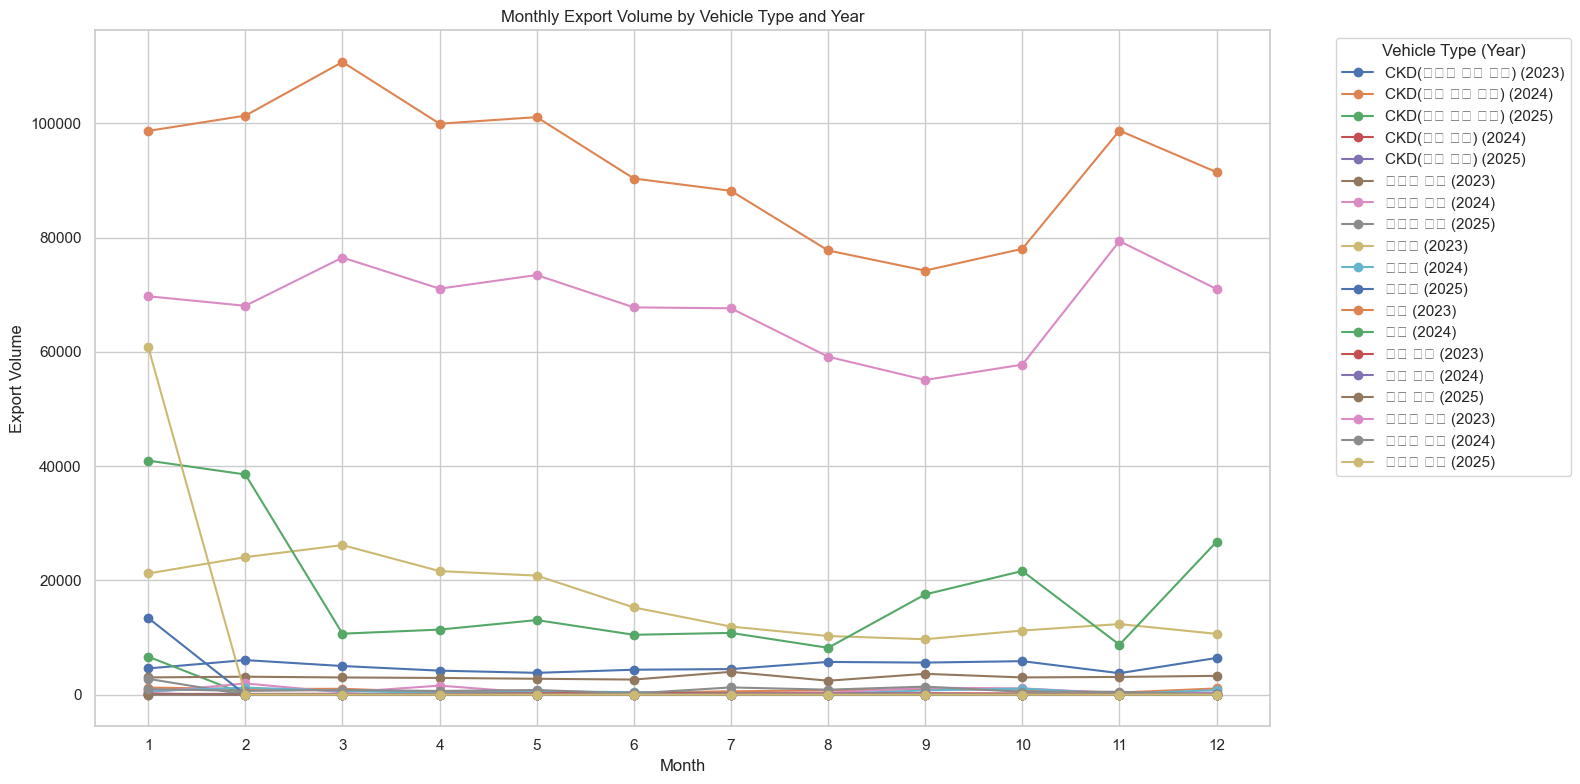

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 제거 (영문만 사용)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

# 선 그래프: 차량 구분 + 연도 조합별 선으로 표현
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

for key, sub_df in df_pivot.groupby('차량 구분'):
    for year, group in sub_df.groupby('연도'):
        plt.plot(group['월'], group['수출량'], label=f"{key} ({year})", marker='o')

# 영어로 그래프 제목/레이블 설정
plt.title("Monthly Export Volume by Vehicle Type and Year")
plt.xlabel("Month")
plt.ylabel("Export Volume")
plt.xticks(range(1, 13))  # 1 to 12 for months
plt.legend(title="Vehicle Type (Year)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# LightGBM
from lightgbm import LGBMRegressor

# ------------------------------
# 1) 데이터 불러오기 및 전처리
# ------------------------------
df = pd.read_csv("D:\manifest-mini\hoyeon\기아.csv")

# id_vars: 고정 변수, value_vars: 월별 수출량 컬럼 (1월~12월)
id_vars = ['국가명', '연도', '기후대', 'GDP', '차종 구분', '차량 구분']
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월', 
              '7월', '8월', '9월', '10월', '11월', '12월']

# Wide -> Long 변환
df_long = pd.melt(df, id_vars=id_vars, value_vars=month_cols, 
                  var_name='월', value_name='수출량')

# '월' 컬럼에서 숫자만 추출 (예: "1월" -> 1)
df_long['월'] = df_long['월'].str.replace('월', '').astype(int)

# 연도+월 => 날짜
df_long['날짜'] = pd.to_datetime(df_long['연도'].astype(str) + '-' + df_long['월'].astype(str) + '-01')

# 국가명 + 날짜 순서대로 정렬
df_long = df_long.sort_values(by=['국가명', '날짜'])

# 다음 달 수출량(타겟) & 전월 수출량(lag 1)
df_long['다음달_수출량'] = df_long.groupby('국가명')['수출량'].shift(-1)
df_long['전월_수출량'] = df_long.groupby('국가명')['수출량'].shift(1)

# 결측 제거
df_model = df_long.dropna(subset=['다음달_수출량', '전월_수출량']).copy()

# 예측 피처, 타겟 설정
features = ['수출량', '전월_수출량', '연도', '월', 'GDP', '국가명', '기후대', '차종 구분', '차량 구분']
target = '다음달_수출량'

X = df_model[features]
y = df_model[target]

# 범주형 -> One-Hot 인코딩
categorical_features = ['국가명', '기후대', '차종 구분', '차량 구분']
X = pd.get_dummies(X, columns=categorical_features)

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 (트리 기반 모델은 필수는 아니지만, 일관성을 위해 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lgbm_tuned = LGBMRegressor()
 
lgbm_tuned.fit(X_train_scaled, y_train)

# ------------------------------
# 3) 예측 및 평가
# ------------------------------
y_pred_lgbm = lgbm_tuned.predict(X_test_scaled)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("\n[LightGBM - Tuned] 평균 제곱 오차(MSE):", mse_lgbm)
print("[LightGBM - Tuned] 결정 계수(R²):", r2_lgbm)



ParserError: Error tokenizing data. C error: Expected 22 fields in line 9242, saw 23
